# Classify the Traffic Signs using Le-Net Architecture

## Step 1 -- Problem Statement

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


## Step 2 - Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

# Data Preparation
from sklearn.utils import shuffle

## step 3 - Loading the Train and Testing  Dataset

In [41]:
root_directory = r"C:\\Users\\Lenovo\\Downloads\\Machine learning\\Machine Learning practical workout\\DL and ML Practical Tutorials - Package\\Project 5\\traffic-signs-data\\"
with open(root_directory+'train.p', mode = 'rb') as train_dataset:
    train = pickle.load(train_dataset)
with open(root_directory+'valid.p', mode = 'rb') as valid_dataset:
    valid = pickle.load(valid_dataset)
with open(root_directory+'test.p', mode = 'rb') as test_dataset:
    test = pickle.load(test_dataset)
    

In [42]:
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [43]:
print (x_train.shape)
print (y_train.shape)

print (x_valid.shape)
print (y_valid.shape)

print (x_test.shape)
print (y_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


## Step 4 - Image Exploration

9


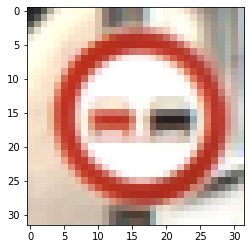

In [44]:
i = random.randint(0, x_train.shape[0])
plt.imshow(x_train[i])
print(y_train[i])

## Step 5 - Data Preaparation

In [45]:
# Shuffling the Dataset

x_train, y_train = shuffle(x_train, y_train)

In [46]:
# coloured to grey scale image

x_train_grey = np.sum(x_train/3, axis = 3, keepdims= True)
x_valid_grey = np.sum(x_valid/3, axis = 3, keepdims= True)
x_test_grey = np.sum(x_test/3, axis = 3, keepdims= True)


In [47]:
# Normalizaion (sub by 128 and divide by 128)

x_train_grey_norm = ( x_train_grey - 128 ) / 128
x_valid_grey_norm = ( x_valid_grey - 128 ) / 128
x_test_grey_norm = ( x_test_grey - 128 ) / 128

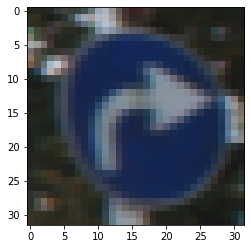

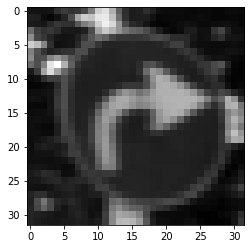

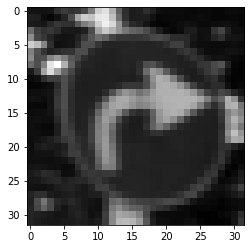

In [48]:
# Viewing the pre-processed Data

i = 109
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_grey[i].squeeze(), cmap= 'gray')
plt.figure()
plt.imshow(x_train_grey_norm[i].squeeze(), cmap = 'gray')

# Even after we pre processed the data, we can extract the information from the image  

## Step 6 - Model Creation

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [50]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [51]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(lr = 0.001), metrics=['accuracy'])

In [52]:
history = cnn_model.fit(x_train_grey_norm,
             y_train,
             batch_size= 500,
             nb_epoch = 50,
             verbose = 1,
             validation_data=(x_valid_grey_norm, y_valid))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 13s 379us/step - loss: 3.1039 - accuracy: 0.1854 - val_loss: 2.6055 - val_accuracy: 0.3188
Epoch 2/50
34799/34799 [==============================] - 12s 351us/step - loss: 1.6546 - accuracy: 0.5457 - val_loss: 1.3872 - val_accuracy: 0.5880
Epoch 3/50
34799/34799 [==============================] - 13s 374us/step - loss: 0.9313 - accuracy: 0.7399 - val_loss: 1.0603 - val_accuracy: 0.6834
Epoch 4/50
34799/34799 [==============================] - 11s 327us/step - loss: 0.6717 - accuracy: 0.8130 - val_loss: 0.9099 - val_accuracy: 0.7390
Epoch 5/50
34799/34799 [==============================] - 7s 214us/step - loss: 0.5431 - accuracy: 0.8500 - val_loss: 0.8293 - val_accuracy: 0.7599
Epoch 6/50
34799/34799 [==============================] - 9s 254us/step - loss: 0.4417 - accuracy: 0.8807 - val_loss: 0.7242 - val_accuracy: 0.8045
Epoch 7/50
34799/34799 [==============================] - 1

## Step 7 - Model Evaluation 

In [57]:
score =cnn_model.evaluate(x_test_grey_norm, y_test)
print('The accuracy of the model is {}'.format(score[1]*100))

12630/12630 [==============================] - 1s 90us/step
The accuracy of the model is 86.73792481422424


In [58]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [60]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

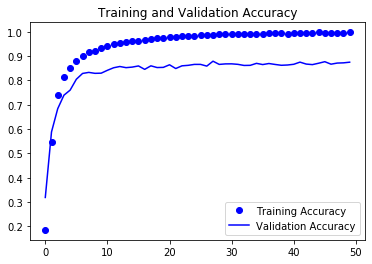

In [61]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

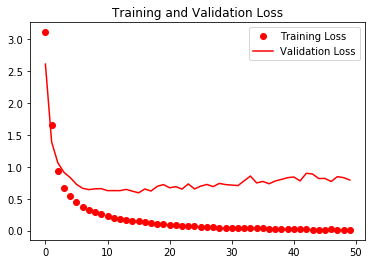

In [62]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [70]:
predict = cnn_model.predict_classes(x_test_grey_norm)

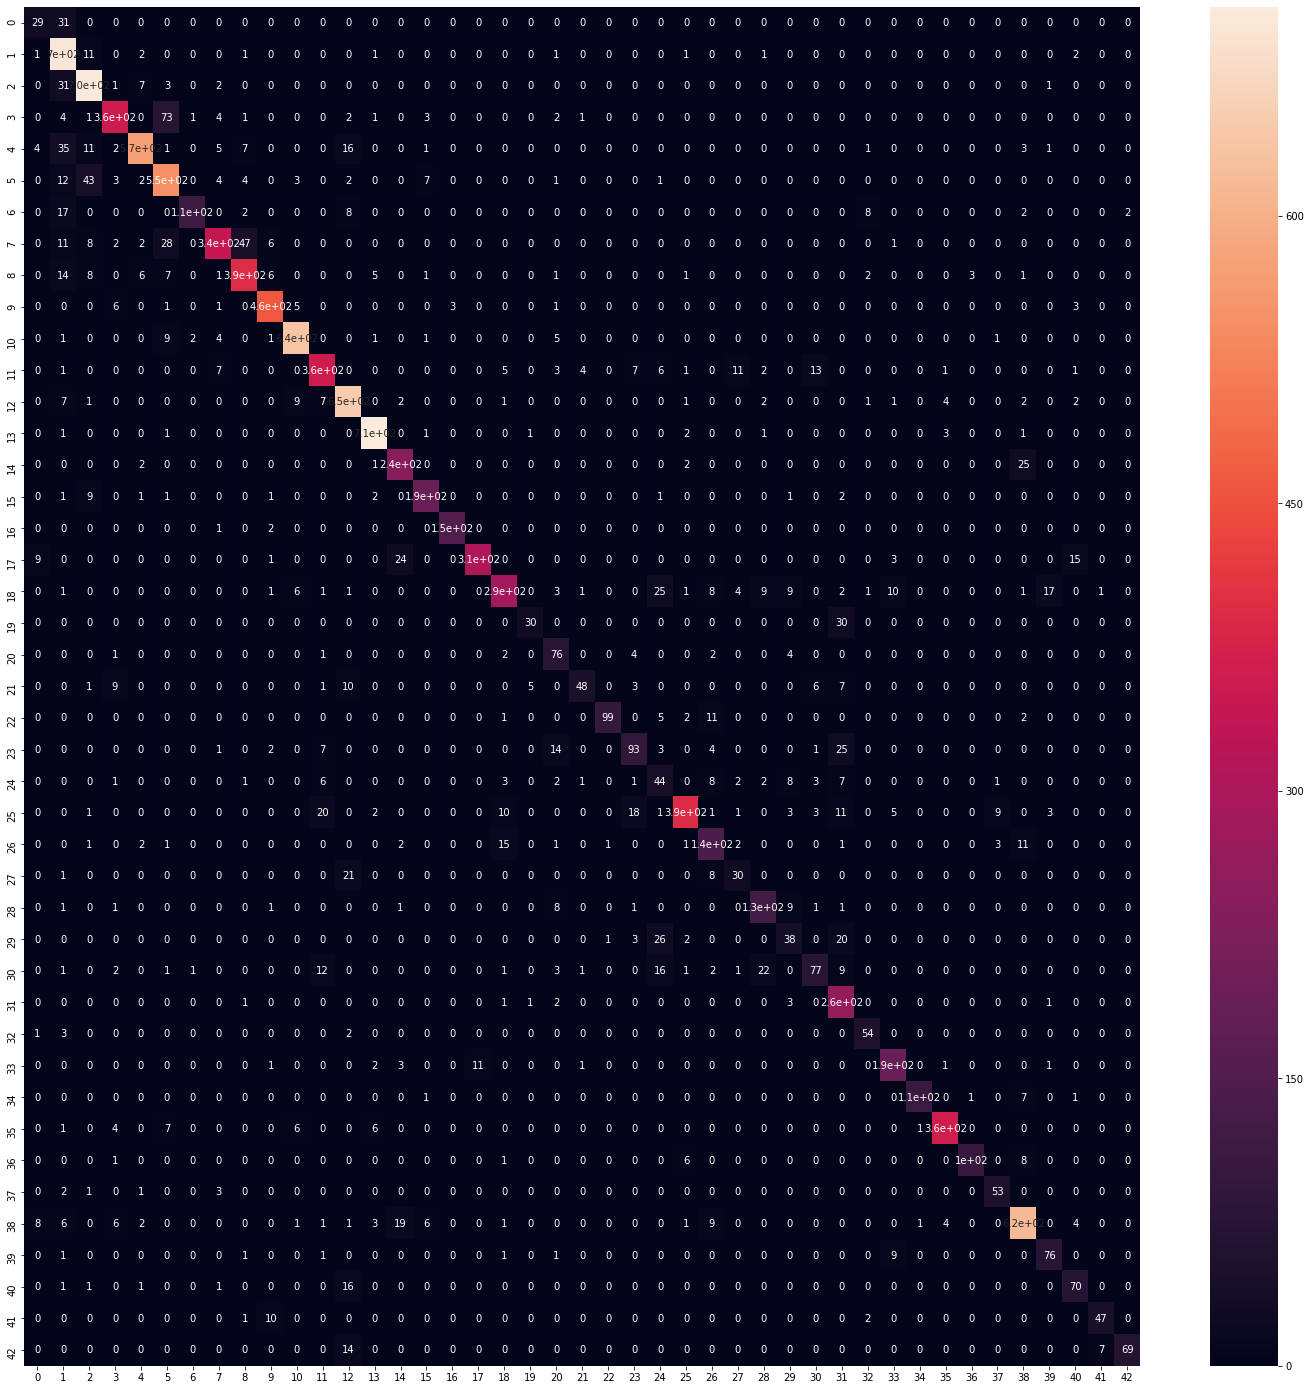

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

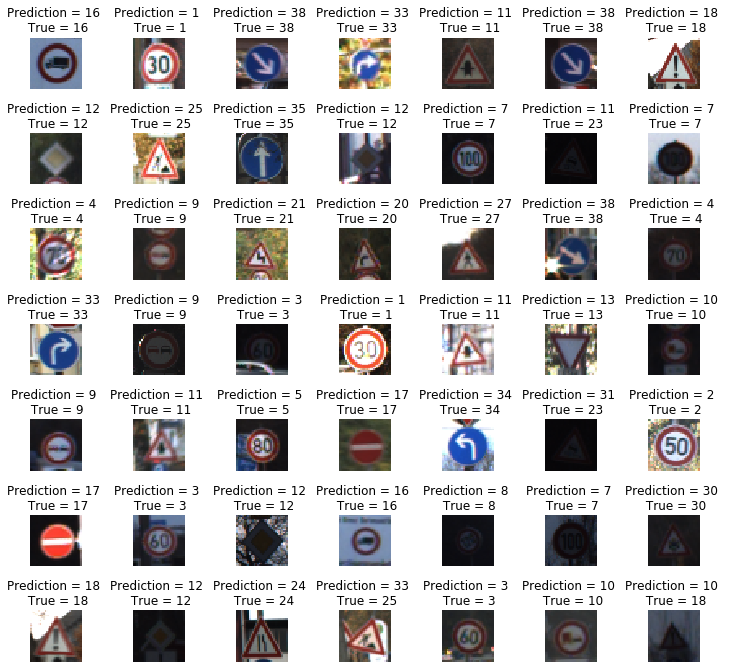

In [77]:
l = 7
w = 7

fig, axes = plt.subplots(l, w, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'. format(predict[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [79]:
cnn_model.save_weights("Traffic sign Detection.h5")
print("Saved model to disk")

Saved model to disk
